In [ ]:
#python -m streamlit run app.py
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


In [3]:
data = []
labels = []
categories = ['Healthy', 'Yellow Leaves', 'Brown Spots', 'Wilted', 'Dry Soil']

for idx, category in enumerate(categories):
    folder = os.path.join("Dataset", category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(idx)

X = np.array(data) / 255.0
y = to_categorical(labels)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(categories), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2500 - loss: 1.6148 - val_accuracy: 0.0000e+00 - val_loss: 5.2858
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.1250 - loss: 2.6267 - val_accuracy: 0.0000e+00 - val_loss: 4.2383
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 0.2500 - loss: 2.2904 - val_accuracy: 0.0000e+00 - val_loss: 2.4825
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.3750 - loss: 1.5696 - val_accuracy: 0.5000 - val_loss: 1.6341
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.2500 - loss: 1.5791 - val_accuracy: 0.5000 - val_loss: 1.4730
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.0000e+00 - loss: 1.6622 - val_accuracy: 0.5000 - val_loss: 1.5230
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.3750 - loss: 1.5000 - val_accuracy: 0.0000e+00 - val_loss: 1.6120
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.1250 - loss: 1.6335 - val_accuracy: 0

In [7]:
model.save("plant_model.h5")
print("✅ Model Saved as 'plant_model.h5'")


✅ Model Saved as 'plant_model.h5'


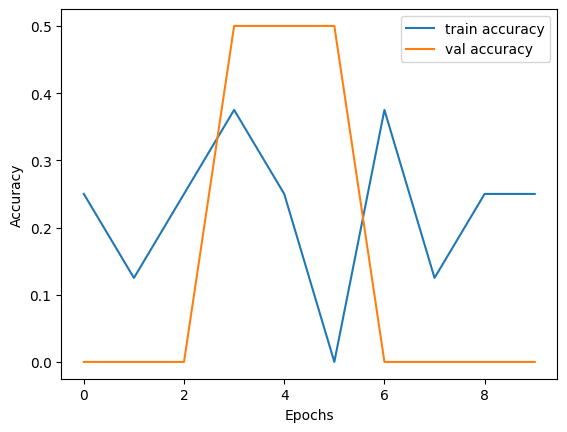

In [8]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
